# 1 Demo 
 
### 1.1 initialize the SDK and connect to the camera

In [7]:
import hik_driver

cam = hik_driver.utils.init_SDK()

2024-11-29 15:37:33,500 - INFO - Initializing SDK...
2024-11-29 15:37:33,513 - INFO - Enumerating devices...
2024-11-29 15:37:33,616 - INFO - Find 1 devices!
2024-11-29 15:37:33,616 - INFO - Printing device info...
2024-11-29 15:37:33,617 - INFO - gige device: 
2024-11-29 15:37:33,617 - INFO - Printing GigE device info...
2024-11-29 15:37:33,618 - INFO - device model name: MV-CB016-10GC-S
2024-11-29 15:37:33,618 - INFO - current ip: 192.168.1.20
2024-11-29 15:37:40,974 - INFO - Opening device...


### 1.2 turn off the auto-exposure mode, and set exposure time mannually

In [8]:
hik_driver.utils.set_exposure_auto_off(cam)
hik_driver.utils.set_exposure_time(cam,30000.0) # 30ms
hik_driver.utils.get_exposure_time(cam)

2024-11-29 15:37:55,312 - INFO - Setting exposure auto mode to off...
2024-11-29 15:37:55,314 - INFO - Setting exposure time to 30000.0...
2024-11-29 15:37:55,318 - INFO - Reading exposure time...
2024-11-29 15:37:55,321 - INFO - ExposureTime: Current=30000.00, Max=9999400.00, Min=15.00


### 1.3 set up PTP mode and issue once "Action Command"

Internally, the action command sends a network notification to a predefined IP address within the LAN. This notification is received by all Hikvision cameras that are configured for Precision Time Protocol (PTP) synchronization. Upon receiving the notification, each synchronized camera triggers a single image acquisition event simultaneously. 

This mechanism ensures that all cameras capture images at the same time.

In [9]:
hik_driver.utils.set_IEEE1588(cam)
hik_driver.utils.set_trigger_mode_On(cam)
hik_driver.utils.set_trigger_source(cam, "Action1")
hik_driver.utils.set_action_keys(cam)
hik_driver.utils.start_grabbing(cam)
hik_driver.utils.issue_action_command(cam)

2024-11-29 15:38:29,105 - INFO - Setting IEEE 1588 ...
2024-11-29 15:38:29,110 - INFO - Setting trigger mode to On...
2024-11-29 15:38:29,114 - INFO - Setting trigger source to Action1...
2024-11-29 15:38:29,119 - INFO - Setting action keys...
2024-11-29 15:38:29,123 - INFO - start grabbing...
2024-11-29 15:38:29,253 - INFO - Action Command Results - Result 1:
2024-11-29 15:38:29,253 - INFO - Action Command Results - Status: True


### 1.4 save the acquisited image

In [10]:
image_frame = hik_driver.utils.pop_image_buffer(cam)


hik_driver.utils.save_non_raw_image(1,image_frame,cam)

2024-11-29 15:38:38,832 - INFO - Frame Info - Width: 1440
2024-11-29 15:38:38,833 - INFO - Frame Info - Height: 1080
2024-11-29 15:38:38,833 - INFO - Frame Info - Pixel Type: 17301513
2024-11-29 15:38:38,833 - INFO - Frame Info - Frame Number: 1
2024-11-29 15:38:38,834 - INFO - Frame Info - Timestamp (High): 403464284
2024-11-29 15:38:38,834 - INFO - Frame Info - Timestamp (Low): 4268908911
2024-11-29 15:38:38,834 - INFO - Frame Info - Timestamp (64bit): 1732865909152964975
2024-11-29 15:38:38,835 - INFO - Frame Info - Timestamp (date format): 2024-11-29 15:38:29.152964975
2024-11-29 15:38:38,835 - INFO - Frame Info - Host Timestamp: 1732865909183
2024-11-29 15:38:38,835 - INFO - Frame Info - Frame Length: 1555200
2024-11-29 15:38:38,836 - INFO - Frame Info - Lost Packet Count: 0
2024-11-29 15:38:38,838 - INFO - Saving non-raw image...


0

### 1.5 show the image

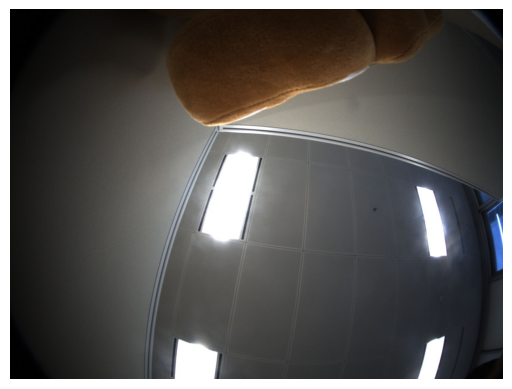

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# 读取JPG图像
image = Image.open('./Image_w1440_h1080_fn1.jpg')

# 显示图像
plt.imshow(image)
plt.axis('off')  # 关闭坐标轴
plt.show()

### 1.6 close the connection with the camera

In [ ]:
hik_driver.utils.close_device(cam)